In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from dataset.sentinel import *
from models.lstm_ae import *
import torch
import random
from config import *

import numpy as np

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [3]:
folder_list = os.listdir(model_results+ 'lstm_ae/')
print(folder_list)

['lstm_ae_16_ft_4s_sc.pth', 'lstm_ae_sl_16_emb_8_sc.pth', 'lstm_ae_sl_16_emb_64_sc.pth', 'lstm_ae_sl_16_emb_8_nl_3_sc.pth', 'lstm_ae_sl_7_emb_8_sc.pth']


In [4]:
added_path = folder_list[2]
print(added_path)

pr_1


In [5]:
model_list = os.listdir(model_results+ 'lstm_ae/{}'.format(added_path))
print(model_list)

['model_1.pt', 'model_2.pt', 'model_3.pt', 'model_4.pt', 'model_5.pt', 'model_6.pt']


columns
# 
tempetarue
voltage

logico per ogni routa (segno corrente)

singola routa:
    motocurrent
    speed 
    voltage
    temperature
    
quattro route:
    motocurrent
    speed 
    voltage
    temperature

In [6]:
model_num = 0

#ae_16_ft_4s_sc
print(model_list[model_num])
model_name = model_list[model_num].split('.')[0]

model_1.pt


In [7]:
model_results+ 'lstm_ae/{}'.format(added_path) + '/' + model_list[model_num]

'/home/robertomorelli/time_series_anomaly_detection/model_results/lstm_ae/pr_1/model_1.pt'

In [8]:
checkpoint  = torch.load(model_results+ 'lstm_ae/{}'.format(added_path) + '/' + model_list[model_num])
params_conf = checkpoint['param_conf']
cfg = checkpoint['cfg']

/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


In [9]:
cols = params_conf['columns']
cols = cfg.dataset.columns[:cols]
sequence_length = params_conf['sequence_length']
batch_size = params_conf['batch_size']
predict = params_conf['predict']
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
out_window = params_conf['out_window']

n_features = params_conf['n_features']
scaled = params_conf['scaled']
sampling_rate = params_conf['sampling_rate']
shuffle = False

In [10]:
latent_dim = params_conf['latent_dim']
par_nums = checkpoint['parameters_number']
seq_len = params_conf['sequence_length']

In [11]:
target = None
from_fdir = False

if from_fdir:
    dataloader_path = '../../fdir/dataloader/'
else:
    dataloader_path = '../../dataloader/'

if target != None:
    no_features = len(cols) - len(target)
else:
    no_features = len(cols)
    target = cols

if scaled:
    if shuffle:
        train_iter = torch.load(dataloader_path + 'train_dataloader_{}_ft_{}_{}_shuffle.pth'.\
                                format(n_features, sampling_rate, sequence_length))
        test_iter = torch.load(dataloader_path + 'test_dataloader_{}_ft_{}_{}_shuffle.pth'.\
                                format(n_features, sampling_rate, sequence_length))
    else:
        train_iter = torch.load(dataloader_path + 'train_dataloader_{}_ft_{}_{}.pth'.\
                                format(n_features, sampling_rate, sequence_length))
        test_iter = torch.load(dataloader_path + 'test_dataloader_{}_ft_{}_{}.pth'.\
                                format(n_features, sampling_rate, sequence_length))
else:
    if shuffle:
        train_iter = torch.load(dataloader_path + 'train_dataloader_not_scaled_{}_ft_{}_{}_shuffle.pth'.\
                                format(n_features, sampling_rate, sequence_length))
        test_iter = torch.load(dataloader_path + 'test_dataloader_not_scaled_{}_ft_{}_{}_shuffle.pth'.\
                                format(n_features, sampling_rate, sequence_length))
    else:
        train_iter = torch.load(dataloader_path + 'train_dataloader_not_scaled_{}_ft_{}_{}.pth'.\
                            format(n_features, sampling_rate, sequence_length))
        test_iter = torch.load(dataloader_path + 'test_dataloader_not_scaled_{}_ft_{}_{}.pth'.\
                            format(n_features, sampling_rate, sequence_length))

In [12]:
model = LSTM_AE(seq_in=params_conf['sequence_length'],seq_out=params_conf['out_window'],
        n_features=params_conf['n_features'], output_size=params_conf['output_size'],
        embedding_dim=params_conf['embedding_dim'], latent_dim=params_conf['latent_dim'],
                n_layers_1=params_conf['n_layers_1'], n_layers_2=params_conf['n_layers_2'])
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device).eval()

LSTM_AE(
  (encoder): Encoder(
    (LSTMenc): LSTM(16, 16, num_layers=2, batch_first=True)
    (LSTM1): LSTM(16, 8, batch_first=True)
    (enc): Linear(in_features=8, out_features=40, bias=True)
  )
  (decoder): Decoder(
    (LSTMdec): LSTM(40, 8, batch_first=True)
    (LSTM1): LSTM(8, 16, num_layers=2, batch_first=True)
    (fc): Linear(in_features=16, out_features=16, bias=True)
  )
)

model = LSTM_AE(seq_in=16,seq_out=16,
        n_features=16, output_size=16,
        embedding_dim=16, latent_dim=40,
                n_layers=1)

In [13]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [14]:
count_parameters(model)

11256

In [23]:
num_batch = 60
shift = np.random.randint(len(test_iter.dataset.df_data)-1000)
#shift = 35592
print(shift)
sigma=5
feats=[0]
batch=[3]
x = np.zeros((num_batch, sequence_length, len(cols)))
for i in range(num_batch):

    x[i,:,:] = test_iter.dataset.df_data.iloc[shift + i*sequence_length:shift + (i+1)*sequence_length,:]\
    .values

    x[i,:,:] = test_iter.dataset.df_data.iloc[shift + i*sequence_length:shift + (i+1)*sequence_length,:]\
    .values
    
xa = x.copy()
for i in feats:
    for j in batch:
        xa[j,:,i] = xa[j,:,i] + sigma*np.std(xa[:,:,i])
     
x = torch.from_numpy(x).float()
xa = torch.from_numpy(xa).float()

1645111


In [24]:
#x, y, idx = next(iter(test_iter))
x, enc, yo = model(x.to('cuda'))
xa, enc, ya = model(xa.to('cuda'))

In [25]:
path = './figure_results/lstm_ae/evaluation/{}/{}/feats_{}/shift_{}/'.format(added_path, model_name, feats[0], shift)
print(path)
save = True

./figure_results/lstm_ae/evaluation/cell1_2/model_1/feats_0/shift_1645111/


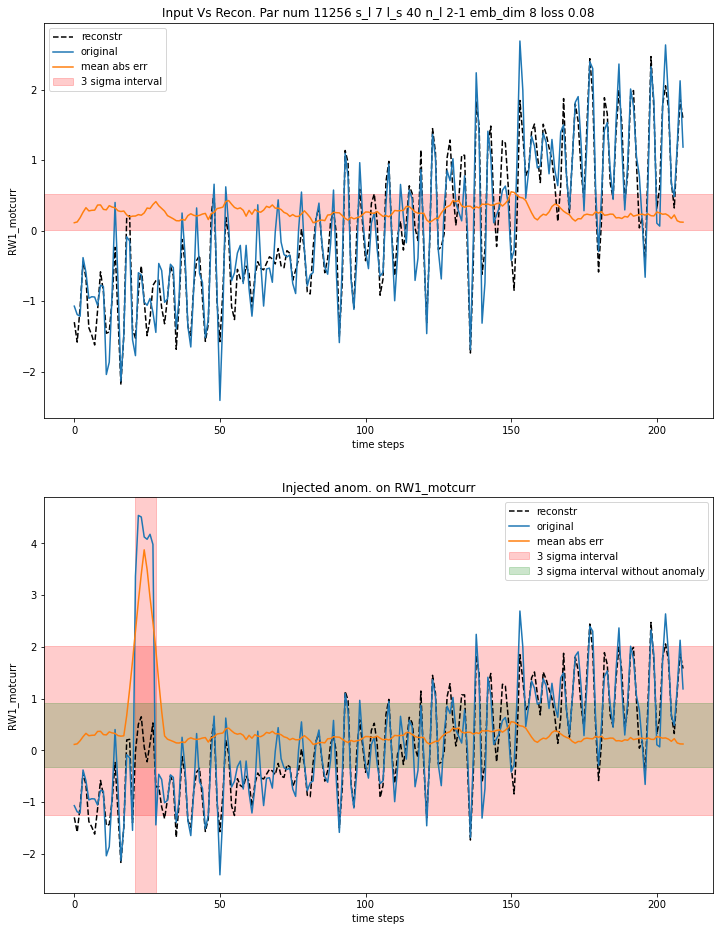

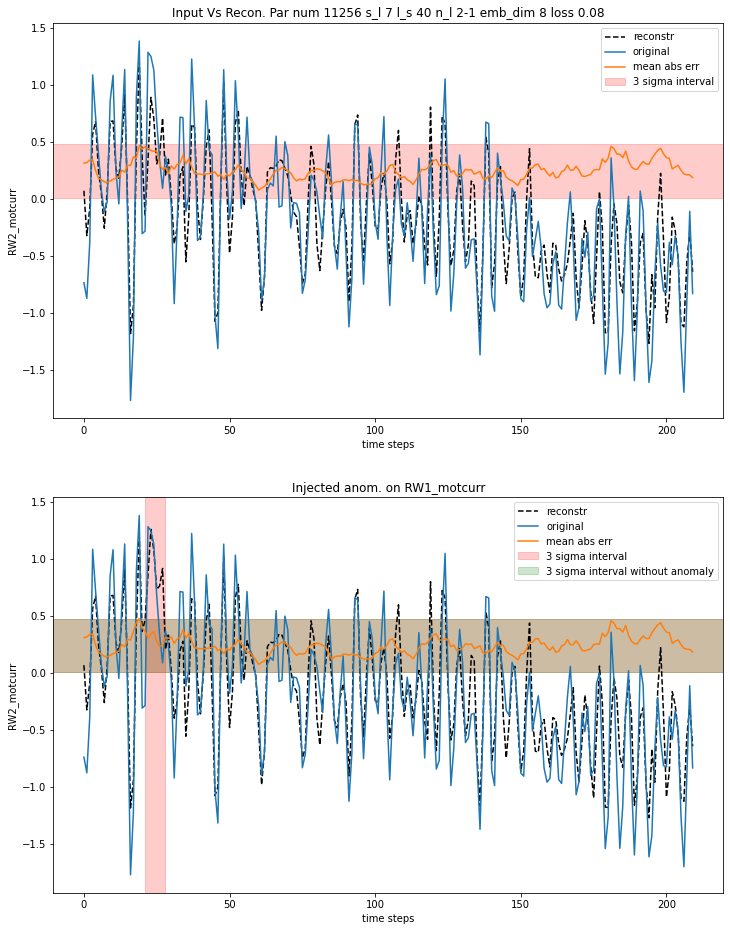

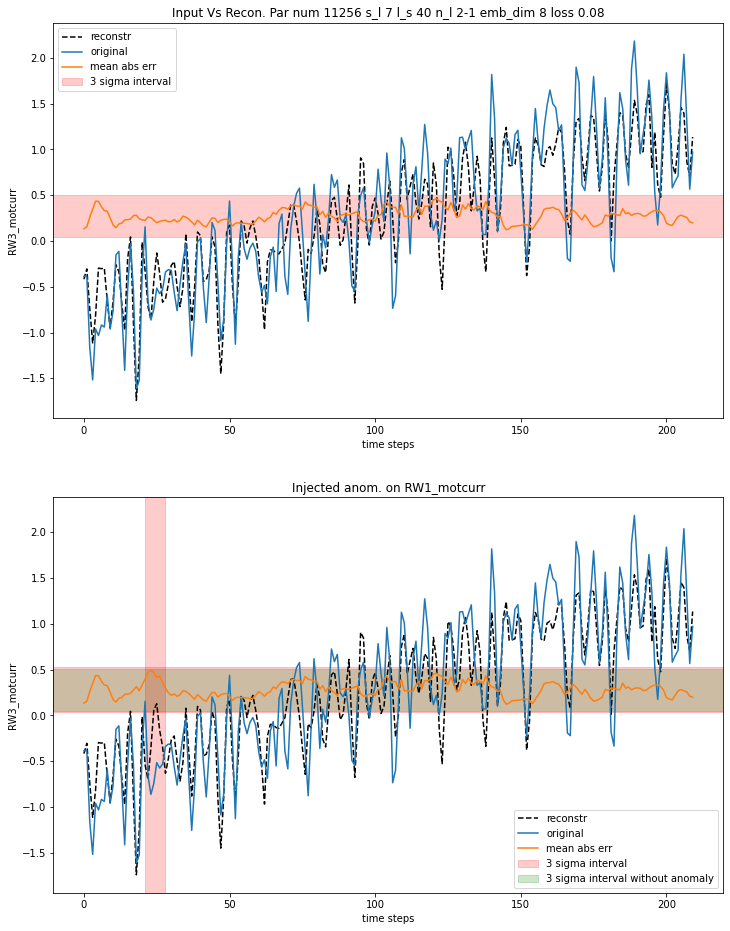

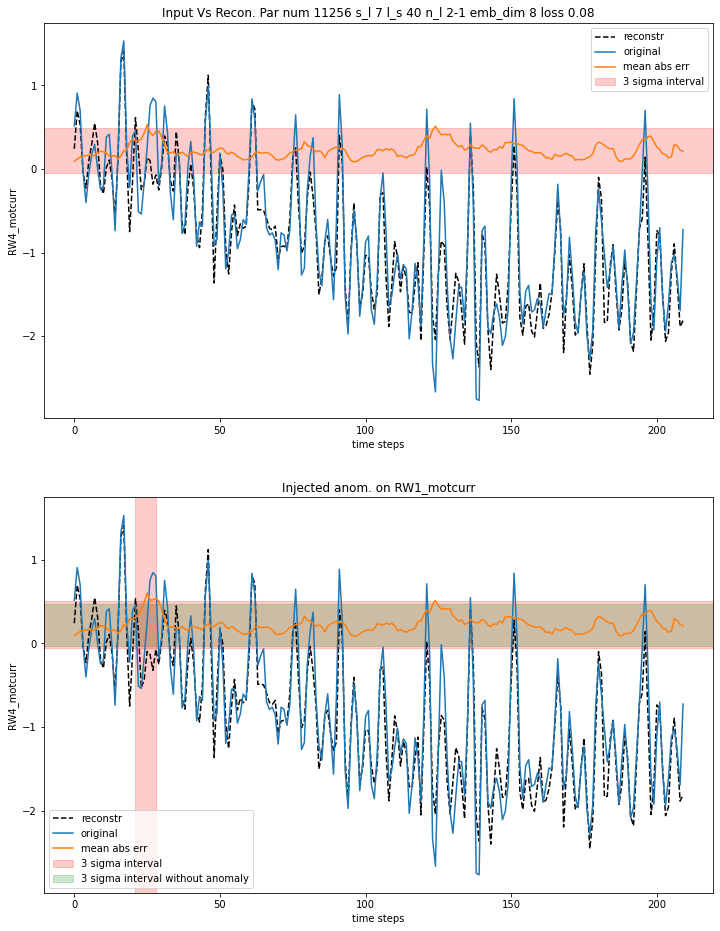

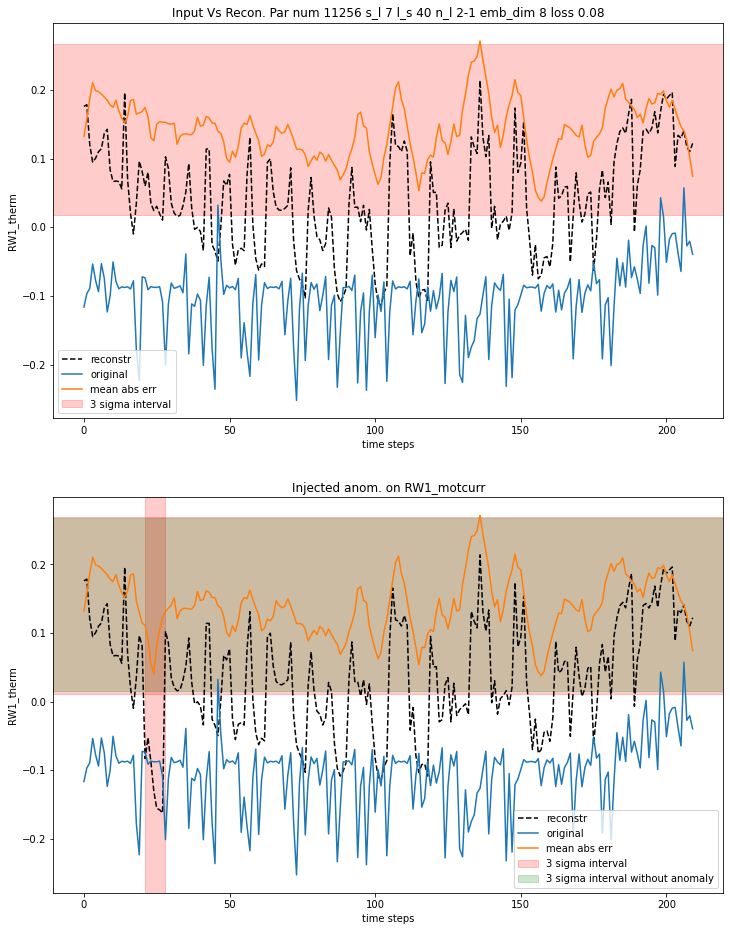

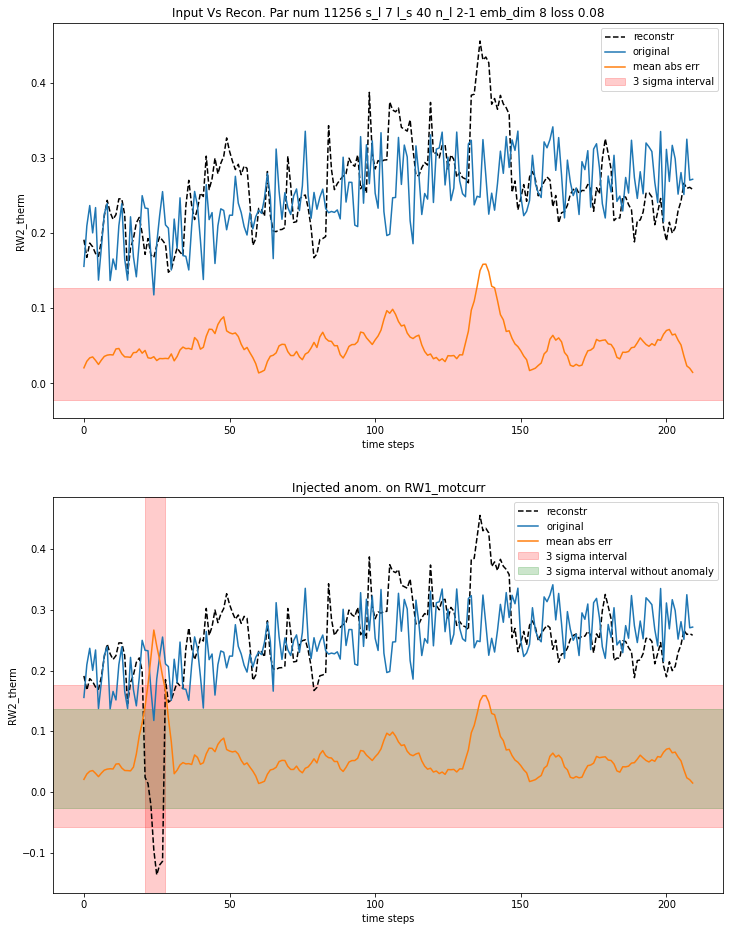

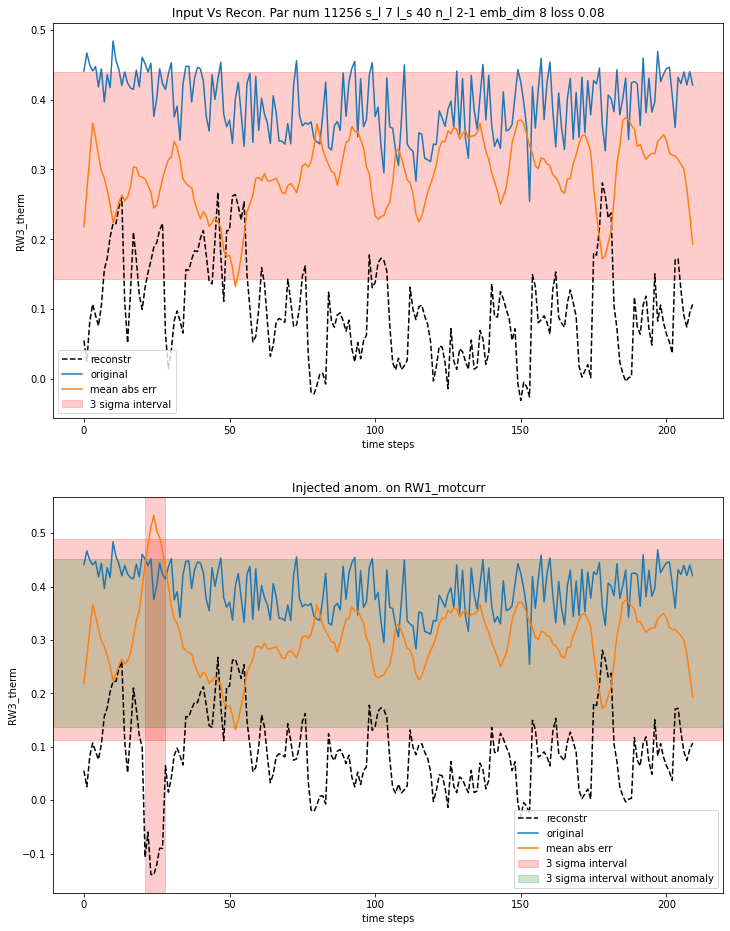

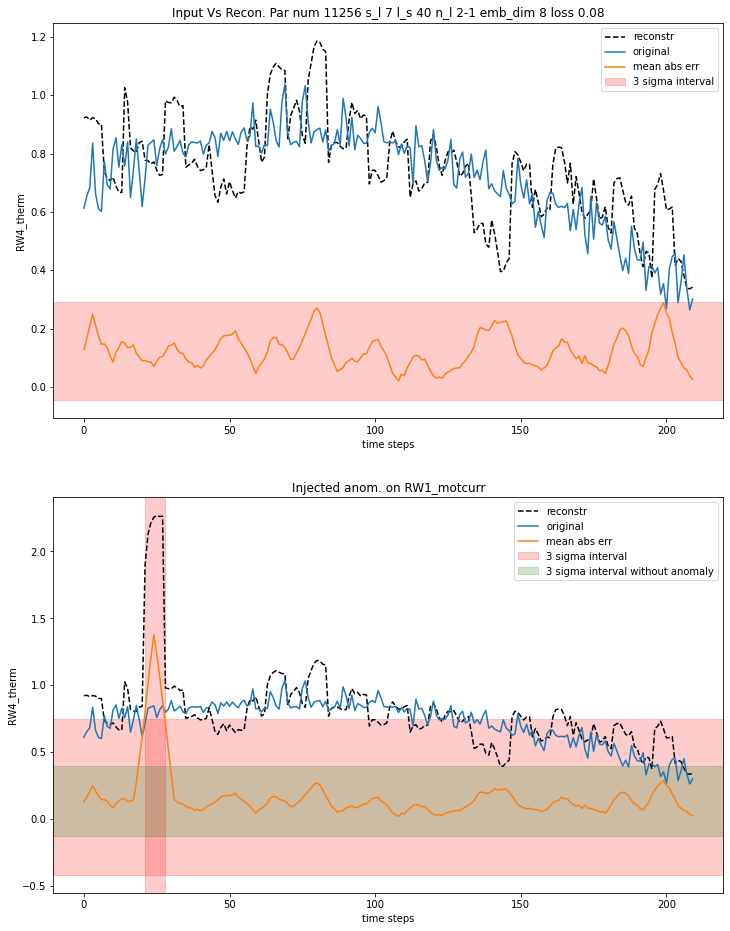

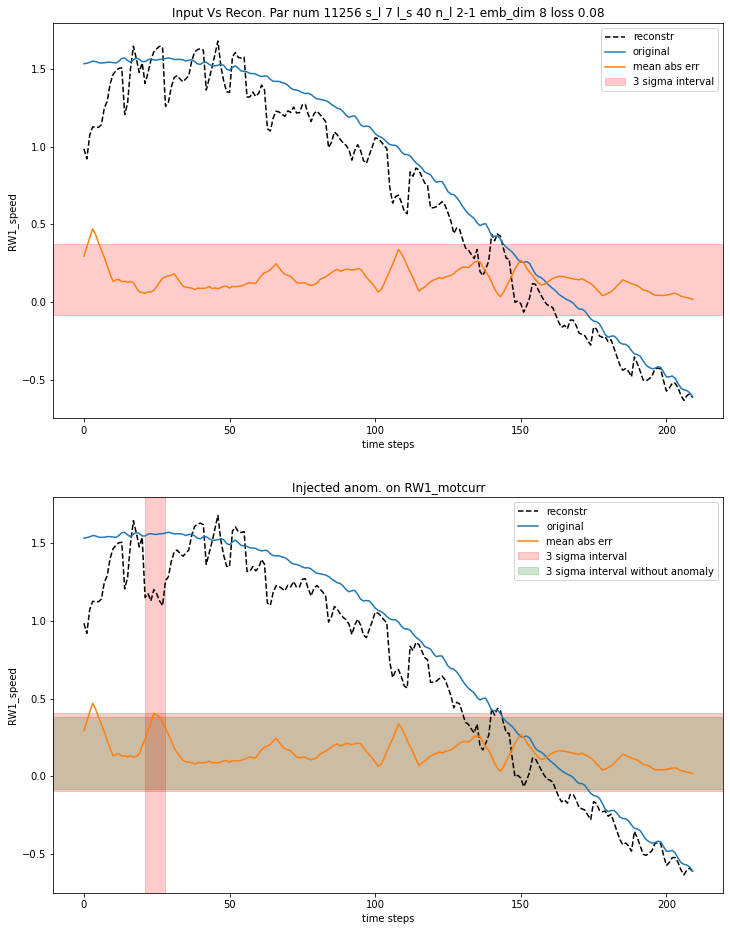

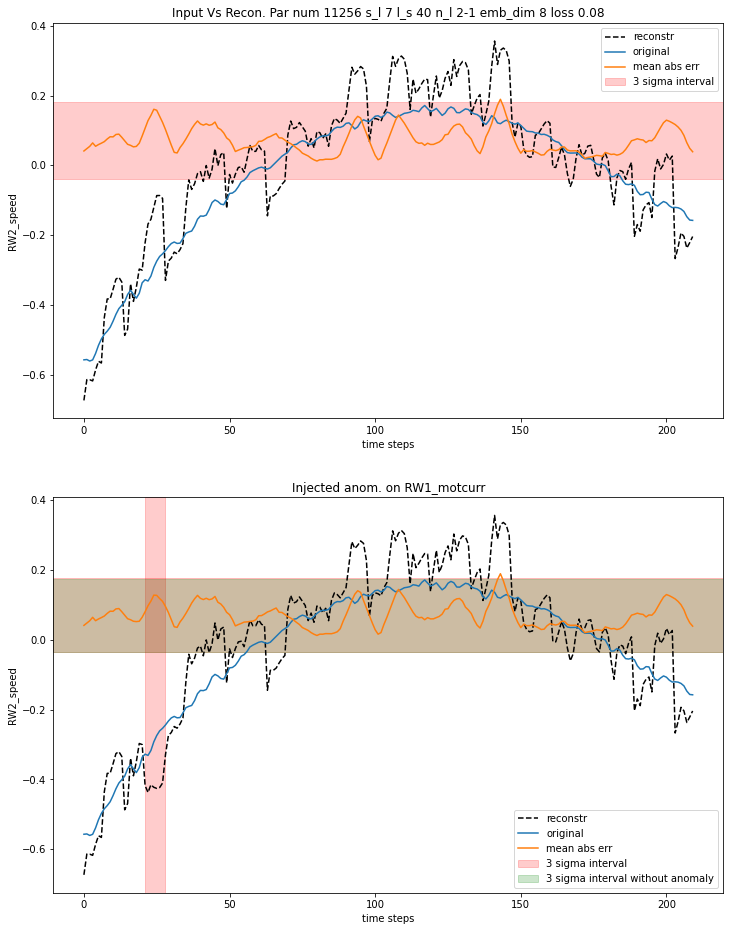

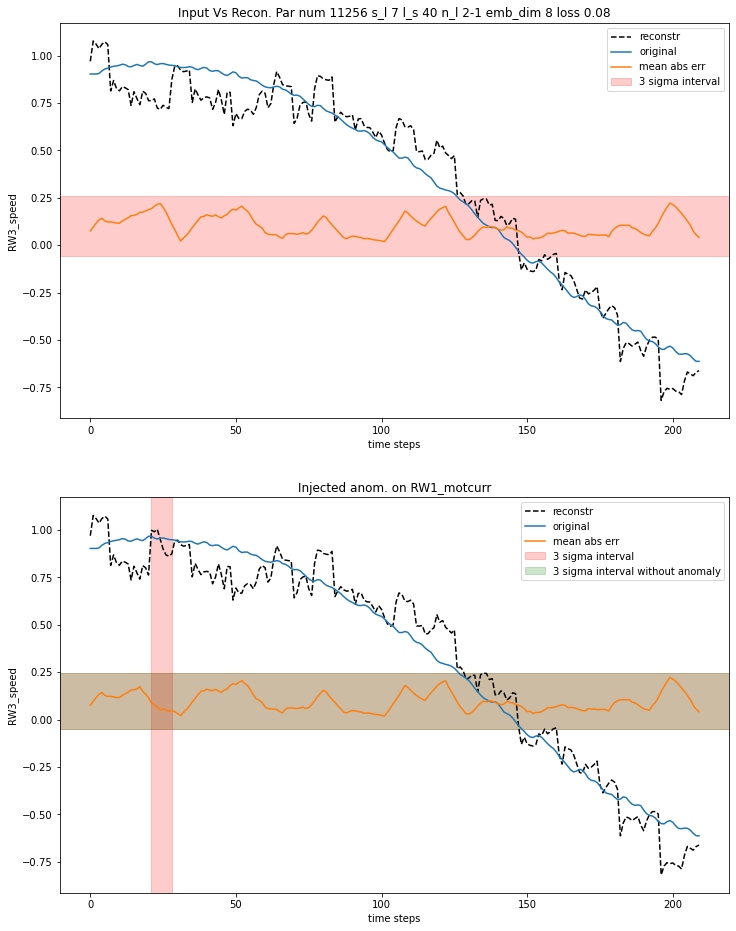

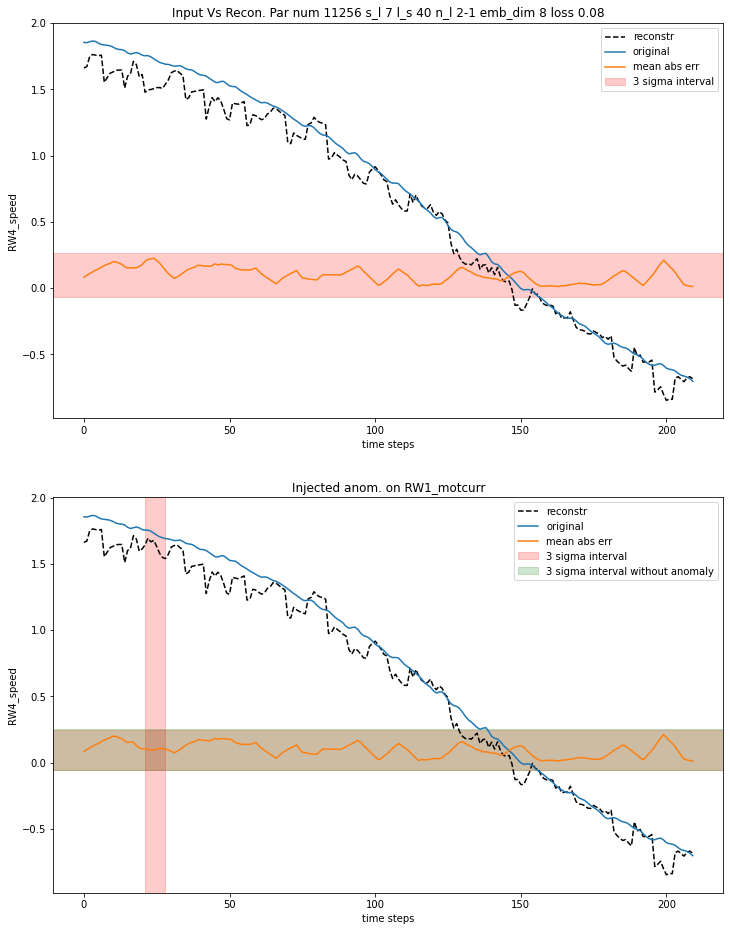

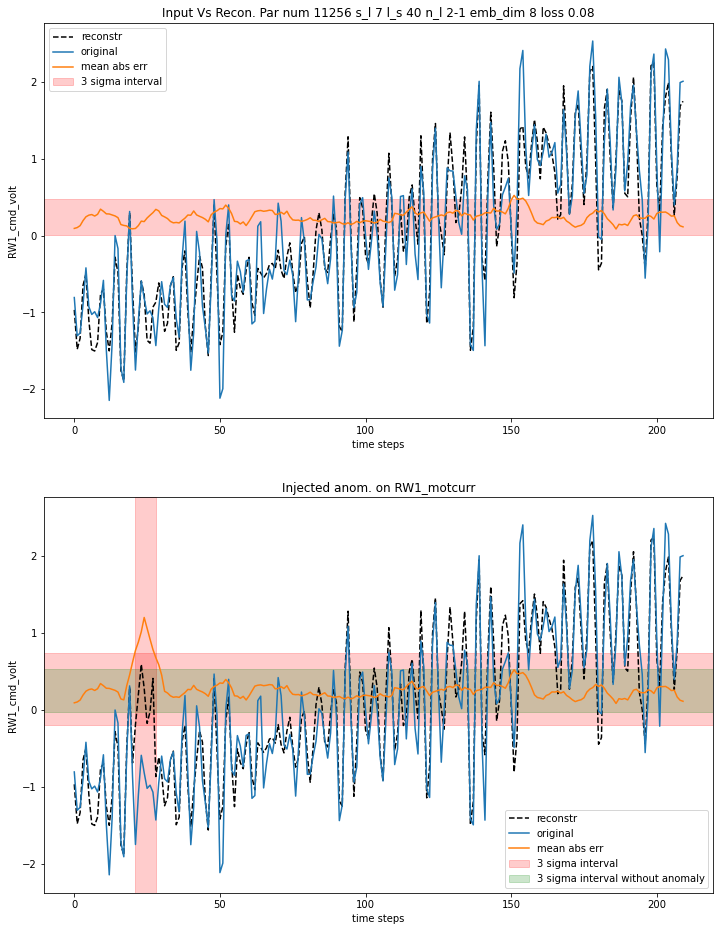

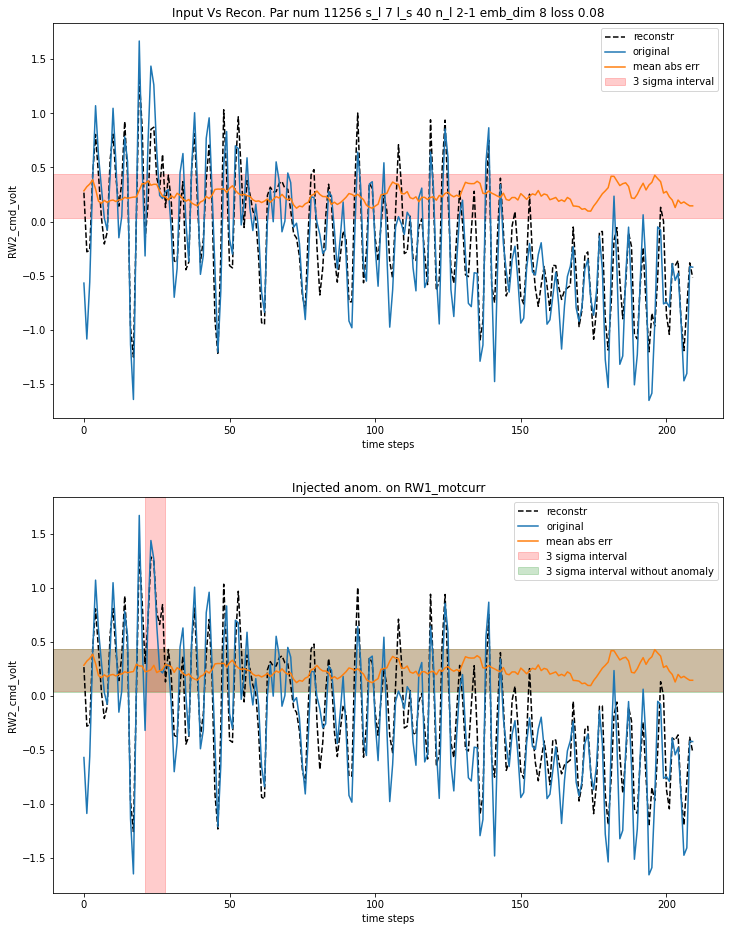

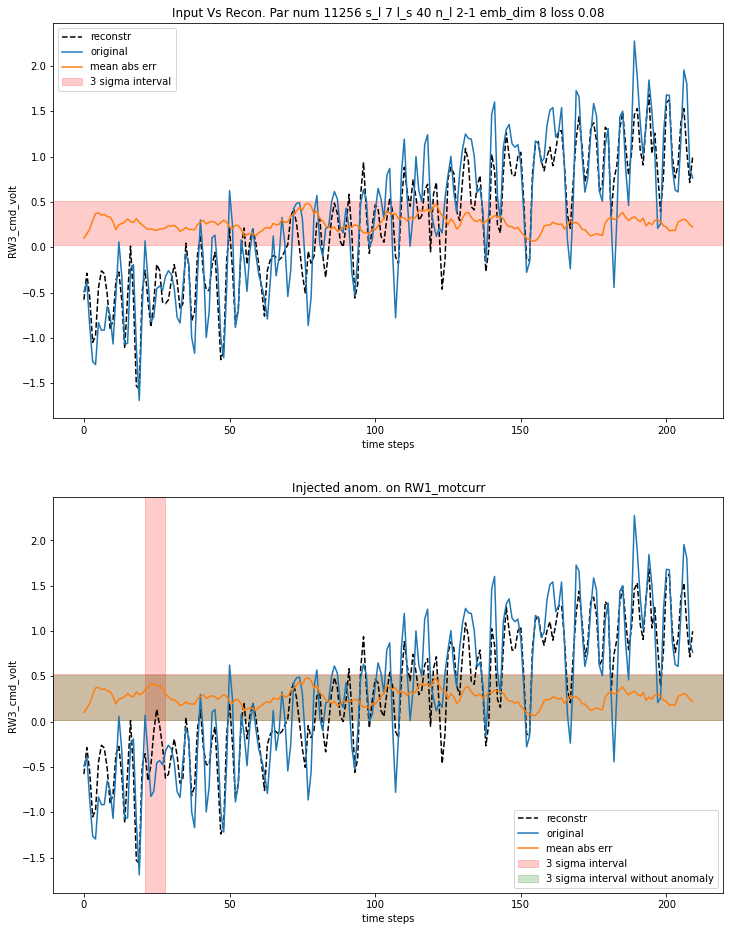

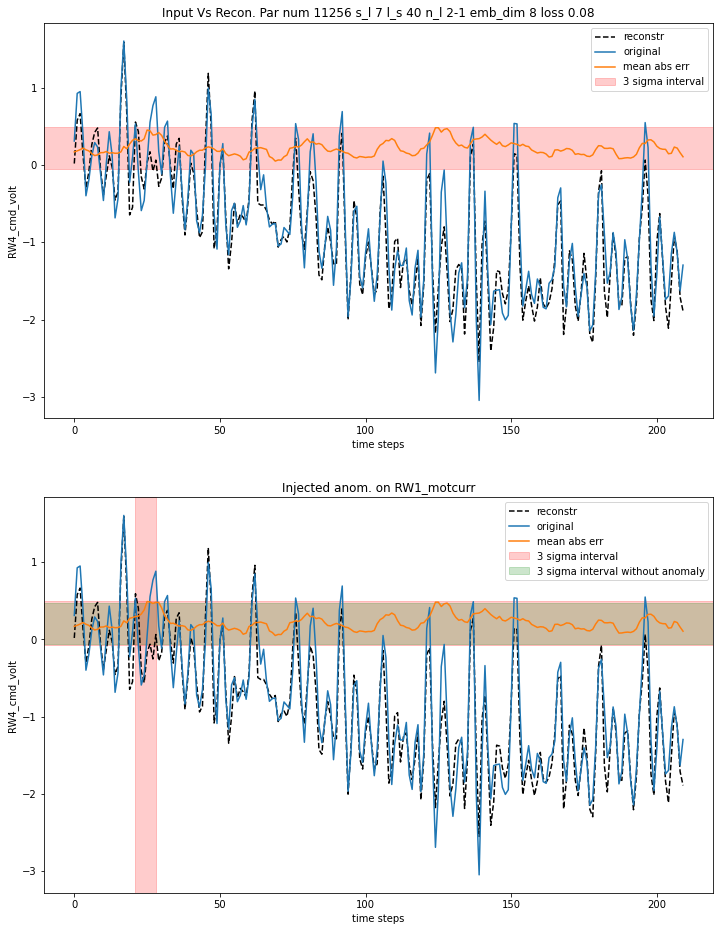

In [26]:
for i in range(x.shape[2]):
    fig, ax = plt.subplots(2,1, figsize=(12,16))

    ax[0].plot(yo.flatten(0,1)[:,i].to("cpu").detach().numpy(), 
               linestyle='--', label='reconstr', color='black')
    ax[0].plot(x.flatten(0,1)[:,i].to("cpu").detach().numpy(), label ='original')
    x_i = x.flatten(0,1)[:,i]
    y_o = yo.flatten(0,1)[:,i]

    loss_u = torch.nn.L1Loss(reduction='none')(y_o, x_i)
    loss_u = moving_average(loss_u.to("cpu").detach().numpy(), seq_len)

    ax[0].plot(loss_u, label ='mean abs err')
    ax[0].set_xlabel('time steps')
    ax[0].set_ylabel('{}'.format(cols[i]))
    ax[0].set_title('Input Vs Recon. Par num {} s_l {} l_s {} n_l {}-{} emb_dim {} loss {}'\
                    .format(par_nums, seq_len, 
                            latent_dim, params_conf['n_layers_1'],params_conf['n_layers_2'],
                            params_conf['embedding_dim'],
                            np.round(checkpoint['loss'],2)))
    #ax[0].hlines(np.mean(loss_u), 0, len(x_i), colors='green')
    ax[0].axhspan(np.mean(loss_u)-3*np.std(loss_u),
                  np.mean(loss_u)+3*np.std(loss_u)
                  , alpha=0.2, color='red', label='3 sigma interval')

    
    #ax[0].axhspan(np.mean(filtered)-3*np.std(loss_u),
    #              np.mean(loss_u)+3*np.std(loss_u)
    #              , alpha=0.2, color='green', label='3 sigma interval without anomaly')
    
    ax[0].legend()


    ax[1].plot(ya.flatten(0,1)[:,i].to("cpu").detach().numpy(), 
               linestyle='--', label='reconstr', color='black')
    ax[1].plot(xa.flatten(0,1)[:,i].to("cpu").detach().numpy(), label ='original')

    x_i = xa.flatten(0,1)[:,i]
    y_o = ya.flatten(0,1)[:,i]

    loss_u = torch.nn.L1Loss(reduction='none')(y_o, x_i)
    loss_u = moving_average(loss_u.to("cpu").detach().numpy(), seq_len)
    filtered = np.concatenate((loss_u[0:(batch[0])*seq_len], loss_u[(batch[0]+1)*seq_len:]))

    #y_test = x_i[(batch[0])*seq_len:(batch[0]+1)*seq_len].to("cpu").detach().numpy()
    #pred = y_o[(batch[0])*seq_len:(batch[0]+1)*seq_len].to("cpu").detach().numpy()
    #mape = np.mean(np.abs((y_test - pred) / y_test))

    ax[1].plot(loss_u, label ='mean abs err')
    ax[1].set_xlabel('time steps')
    ax[1].set_ylabel('{}'.format(cols[i]))
    ax[1].set_title('Injected anom. on {}'\
                    .format(cols[feats[0]]))
                           #,mape
                           #,loss))

    ax[1].axvspan((batch[0])*seq_len, (batch[0]+1)*seq_len, alpha=0.2, color='red')
    #ax[1].hlines(np.mean(loss_u), 0, len(x_i), colors='green', label = 'anom seq in {} with {} sigma deviation'\
    #             .format(feats[0], sigma))
    ax[1].axhspan(np.mean(loss_u)-3*np.std(loss_u),
                  np.mean(loss_u)+3*np.std(loss_u), alpha=0.2, color='red', label='3 sigma interval')
        
    ax[1].axhspan(np.mean(filtered)-3*np.std(filtered),
                  np.mean(filtered)+3*np.std(filtered)
                  , alpha=0.2, color='green', label='3 sigma interval without anomaly')
    ax[1].legend()

    if save:
        os.makedirs(path, exist_ok=True)
        plt.savefig(path + '{}_shift_{}_{}_sigma_{}_batch_{}.png'.format(cols[i],shift,sigma,i, num_batch))


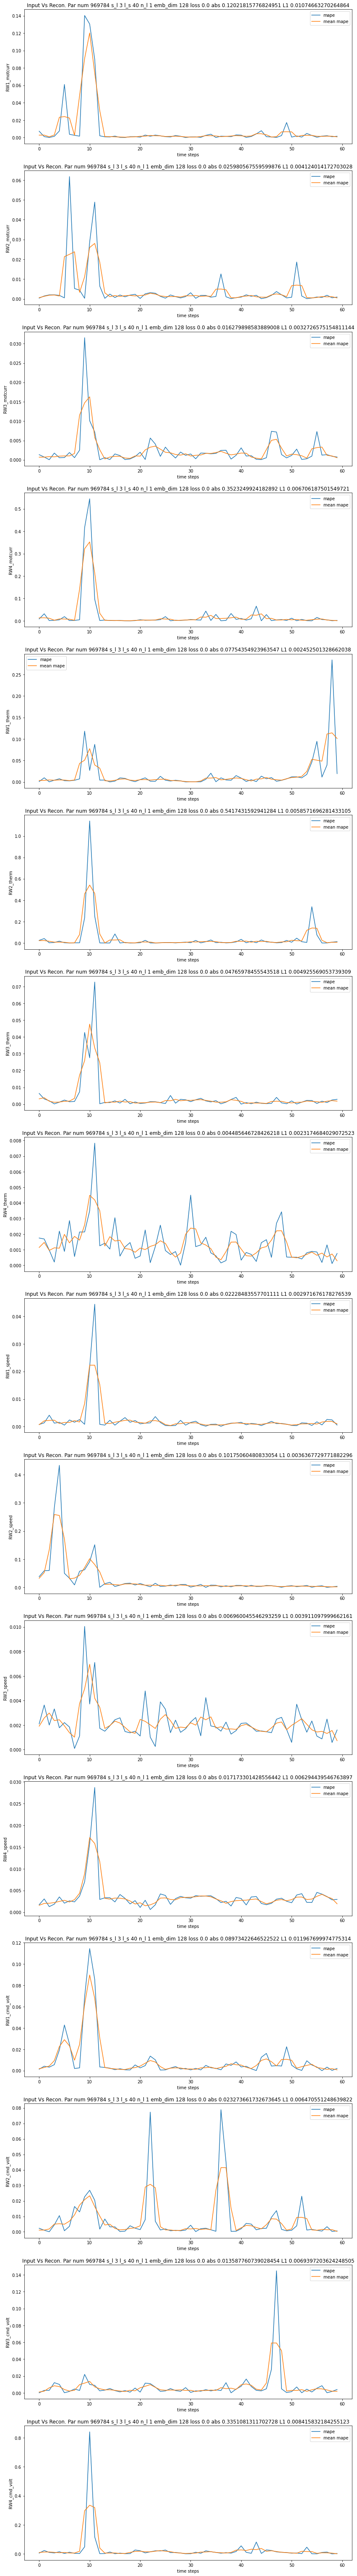

In [244]:
fig, ax = plt.subplots(16, figsize=(14,112))

for i in range(x.shape[2]):

    #ax[i].plot(yo.flatten(0,1)[:100,i].to("cpu").detach().numpy(), linestyle='--', label='reconstr')
    #ax[i].plot(x.flatten(0,1)[:100,i].to("cpu").detach().numpy(), label ='original')
    x_i = x.flatten(0,1)[:100,i]
    y_o = yo.flatten(0,1)[:100,i]

    loss = torch.nn.L1Loss()(y_o, x_i)
    loss_u = torch.nn.L1Loss(reduction='none')(y_o, x_i)
    loss_u = loss_u.to("cpu").detach().numpy() / np.abs(x_i.to("cpu").detach().numpy())
    
    mean = moving_average(loss_u, seq_len)

    
    y_test = x_i[(batch[0])*seq_len:(batch[0]+1)*seq_len].to("cpu").detach().numpy()
    pred = y_o[(batch[0])*seq_len:(batch[0]+1)*seq_len].to("cpu").detach().numpy()
    
    mape = np.mean(np.abs((y_test - pred) / y_test))

    #ax[i].plot(loss_mse_u_per.to("cpu").detach().numpy(), label ='mse')
    ax[i].plot(loss_u, label ='mape')
    ax[i].plot(mean, label ='mean mape')
    
    ax[i].set_xlabel('time steps')
    ax[i].set_ylabel('{}'.format(cols[i]))
    ax[i].set_title('Input Vs Recon. Par num {} s_l {} l_s {} n_l {} emb_dim {} loss {} abs {} L1 {}'\
                    .format(par_nums, seq_len, 
                            latent_dim, params_conf['n_layers'],
                            params_conf['embedding_dim'],
                            np.round(checkpoint['loss'],2)
                           ,mape
                           ,loss))
    
    ax[i].legend()
    #if i%4==0 and i != 0:
    #    j+=1
if save:
    os.makedirs(path, exist_ok=True)
    plt.savefig(path + 'reconstruction_results_shift_{}_{}_error_compare.png'.format(shift,sigma))

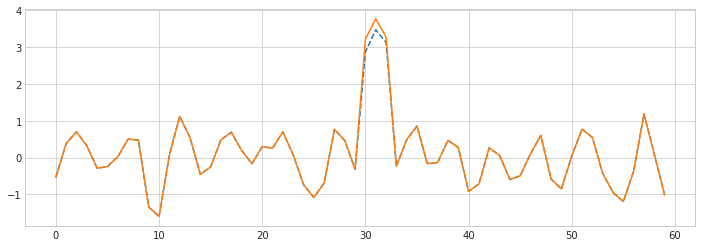

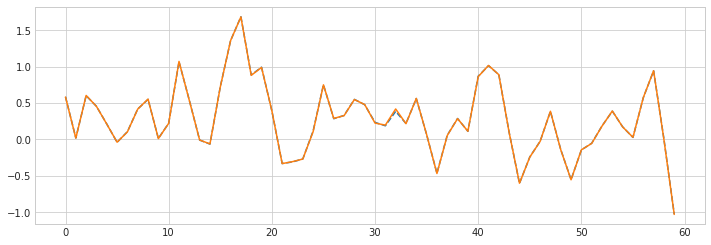

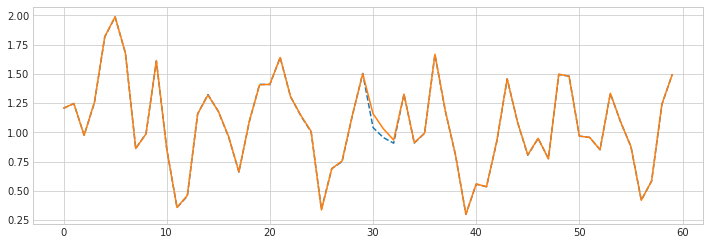

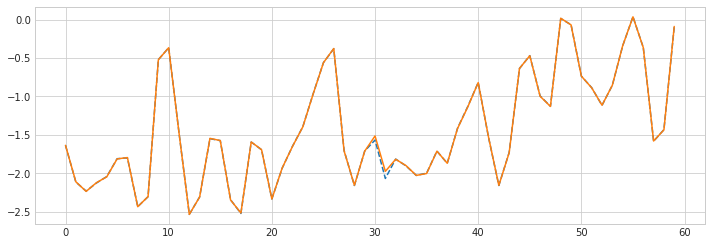

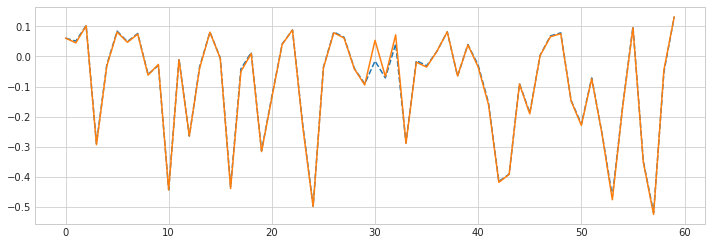

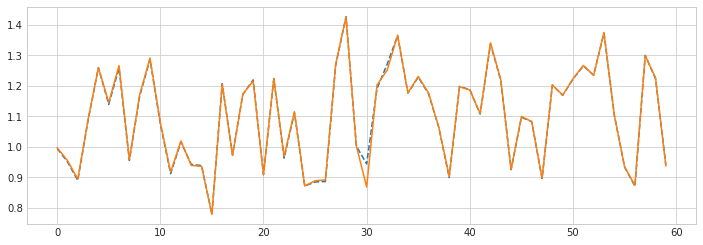

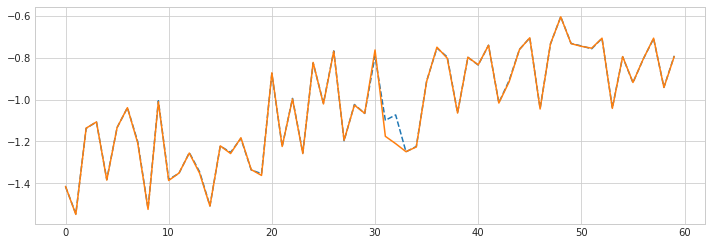

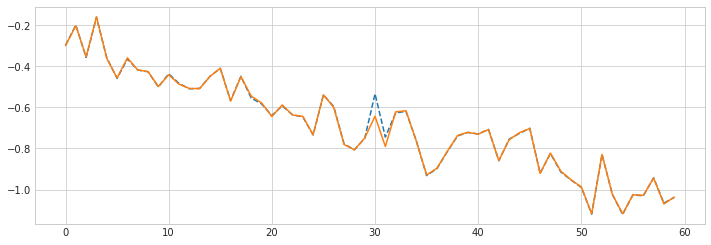

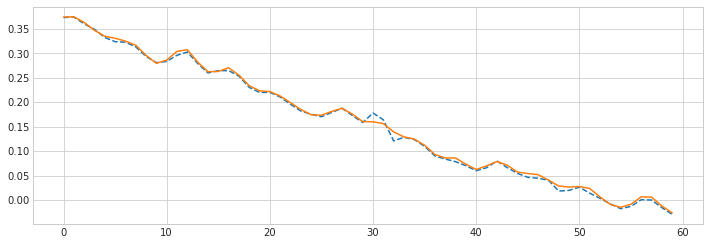

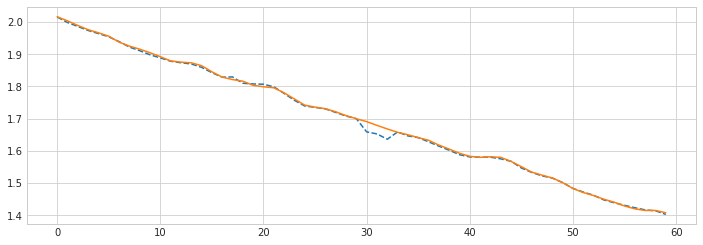

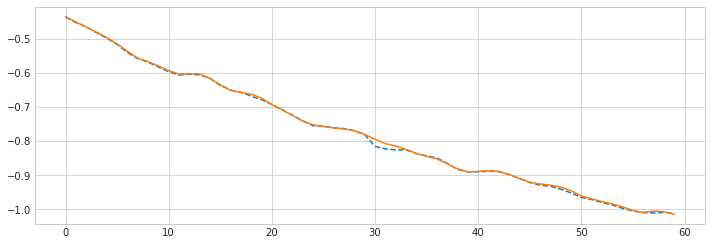

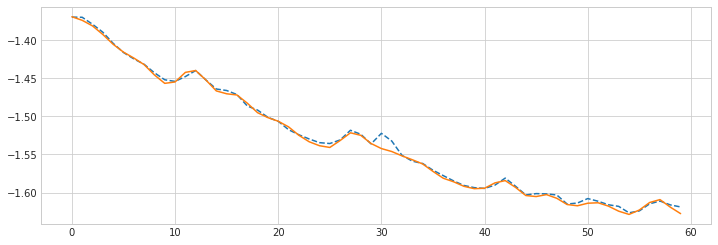

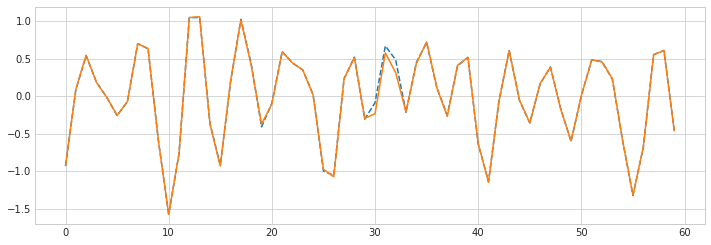

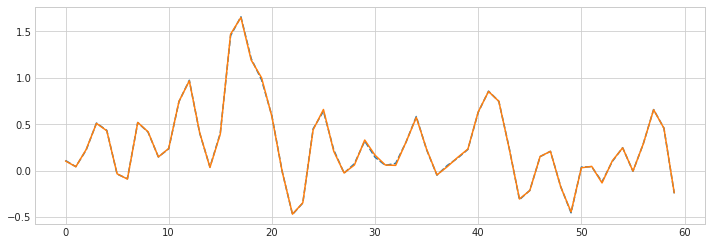

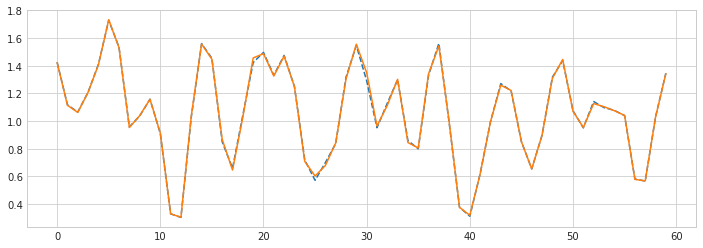

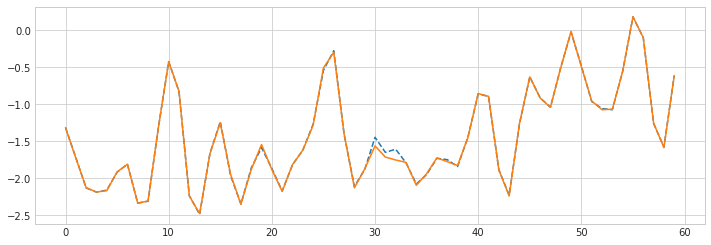

In [28]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(12,4))
    #x = np.linspace(0, sequence_length)
    plt.plot(yo.flatten(0,1)[:,i].to("cpu").detach().numpy(), linestyle='--')

    plt.plot(x.flatten(0,1)[:,i].to("cpu").detach().numpy())

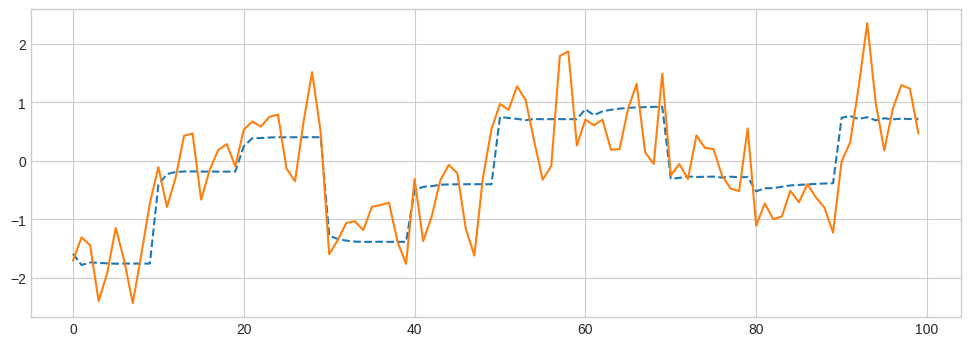

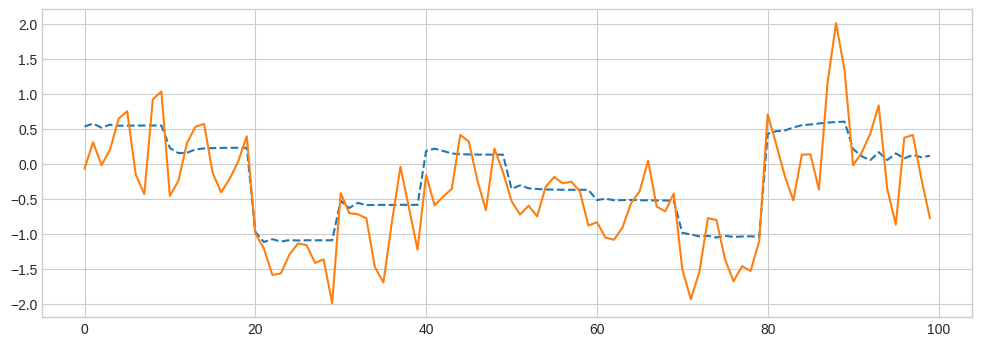

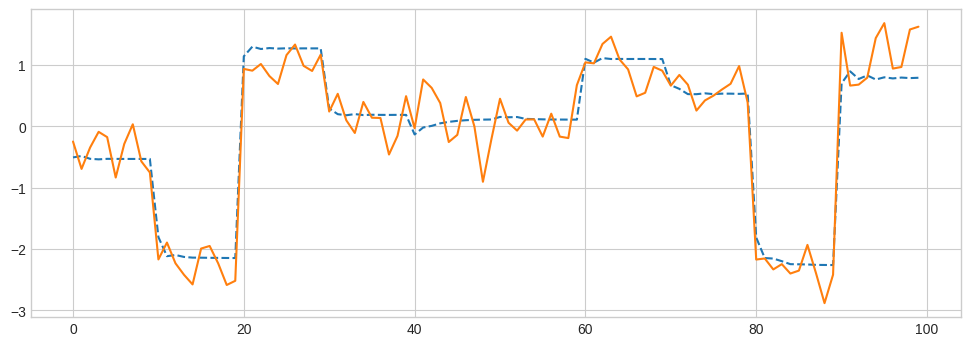

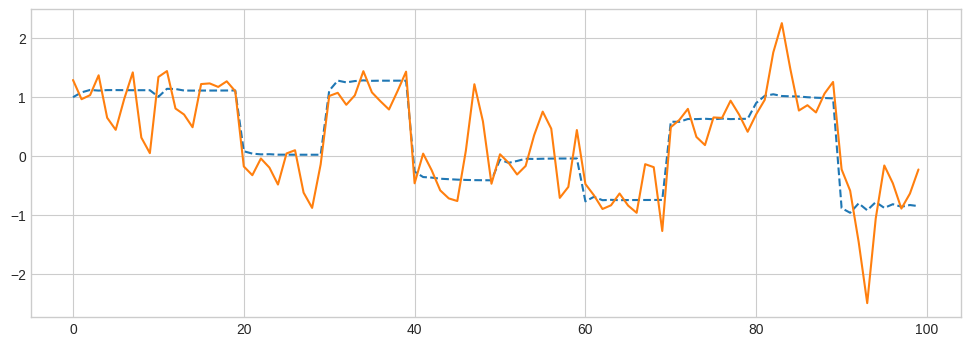

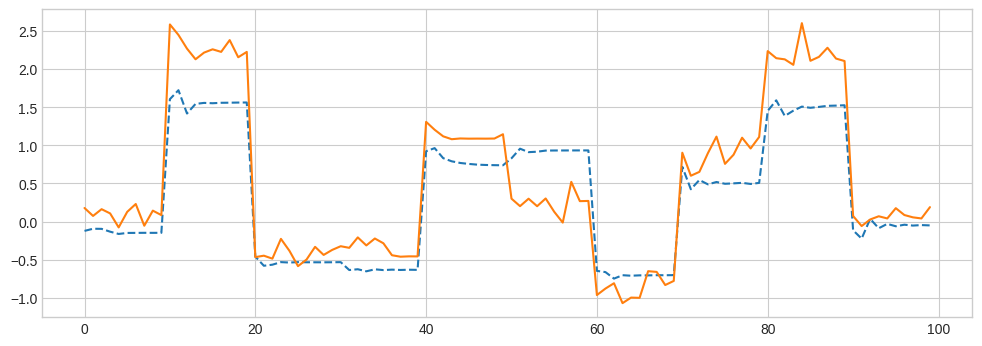

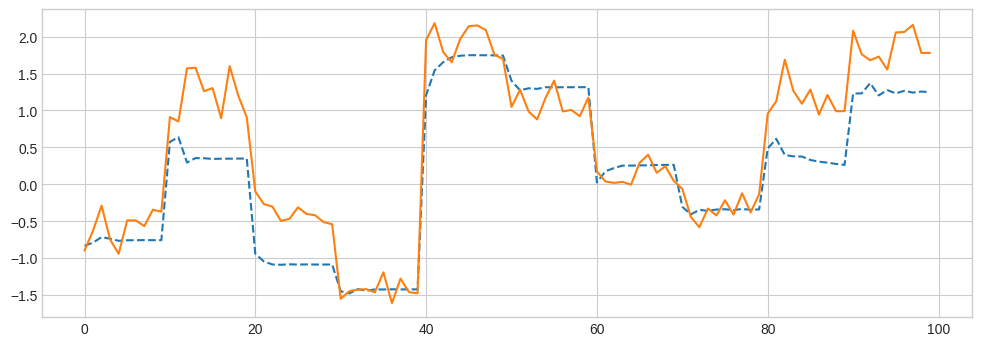

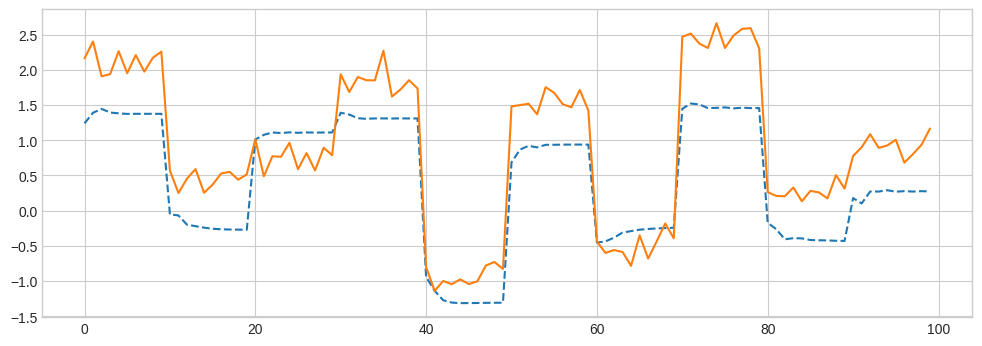

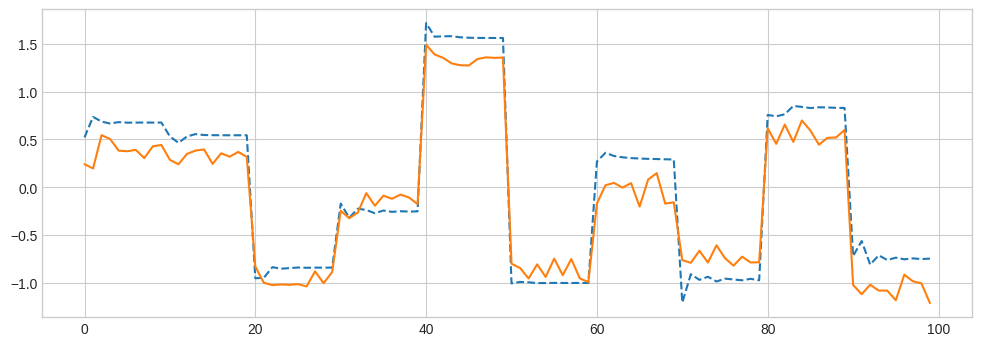

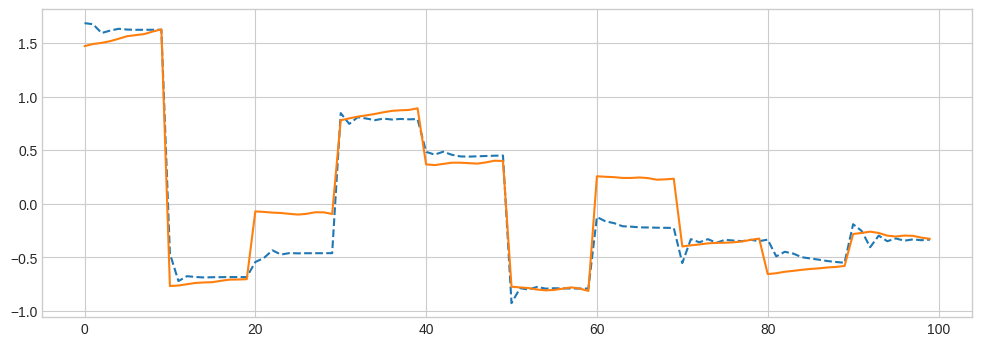

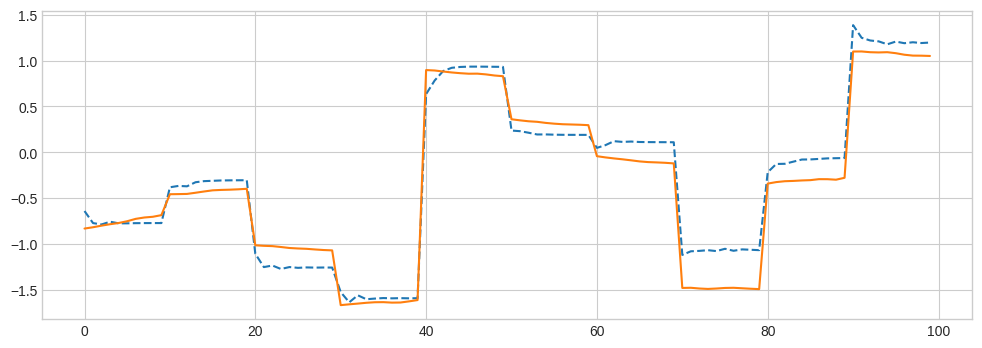

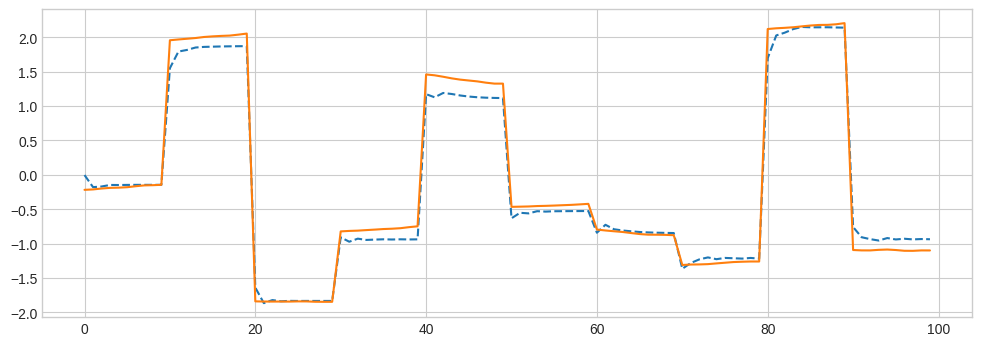

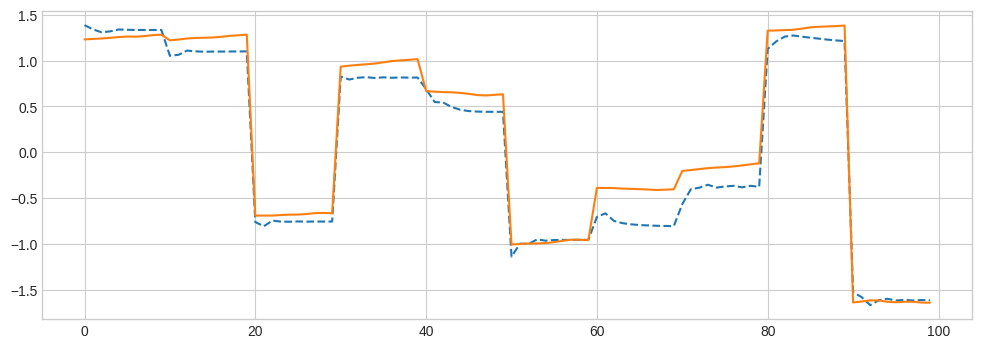

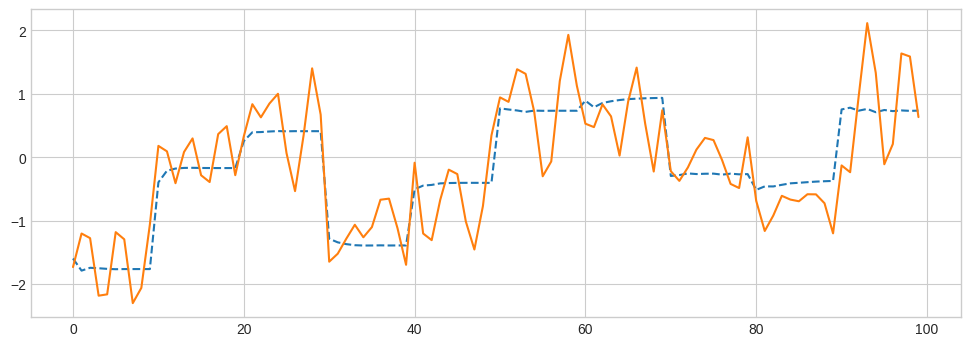

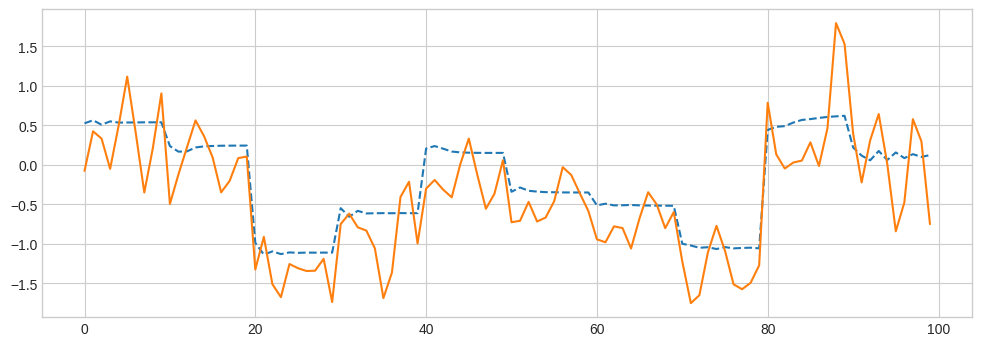

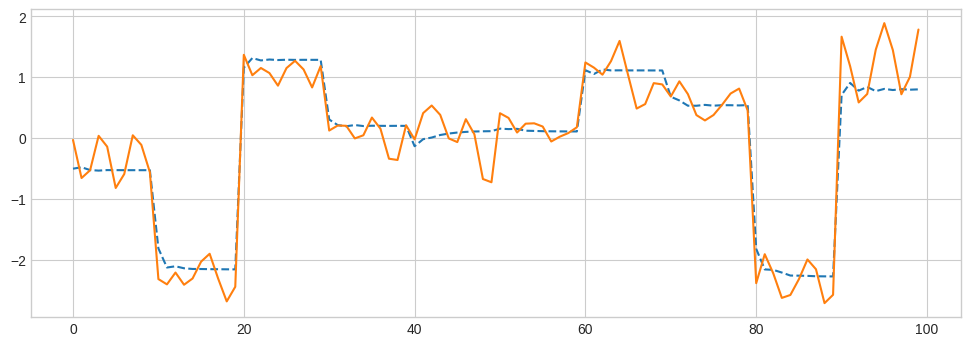

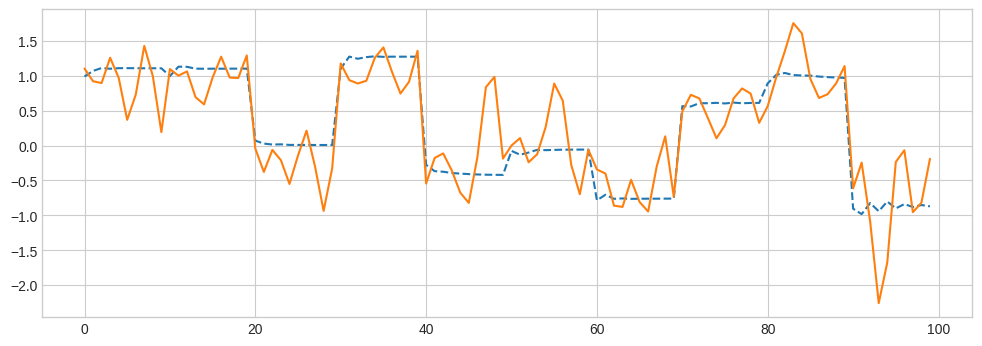

In [44]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(12,4))
    #x = np.linspace(0, sequence_length)
    plt.plot(yo.flatten(0,1)[:,i].to("cpu").detach().numpy(), linestyle='--')

    plt.plot(x.flatten(0,1)[:,i].to("cpu").detach().numpy())

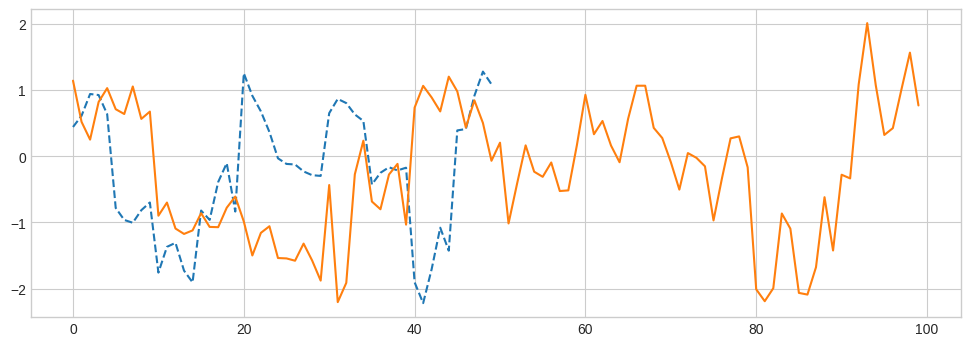

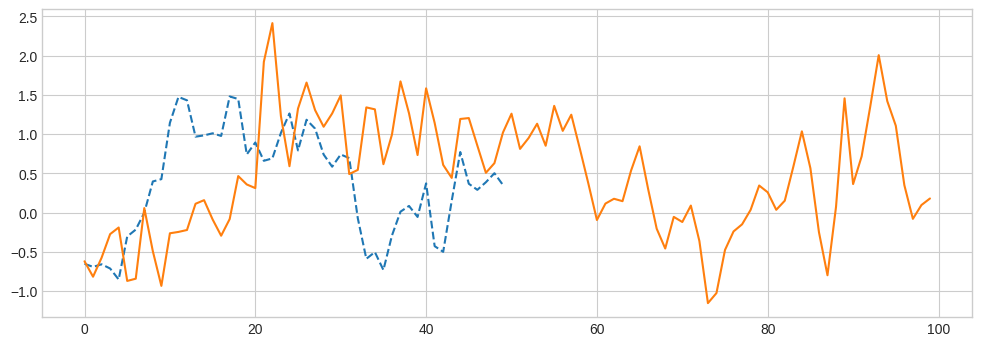

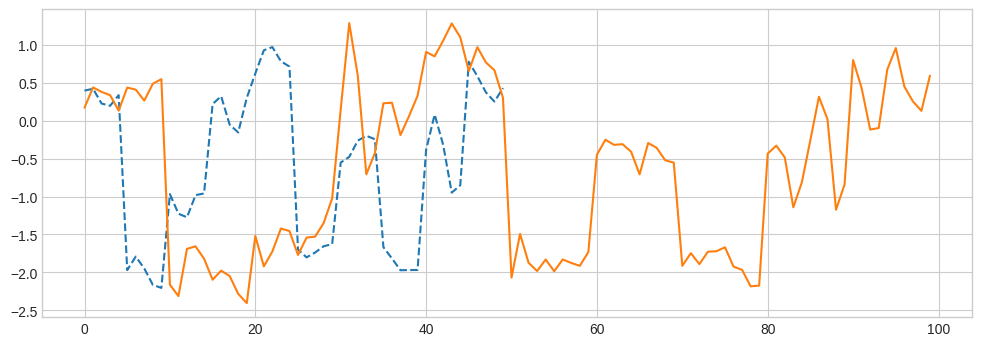

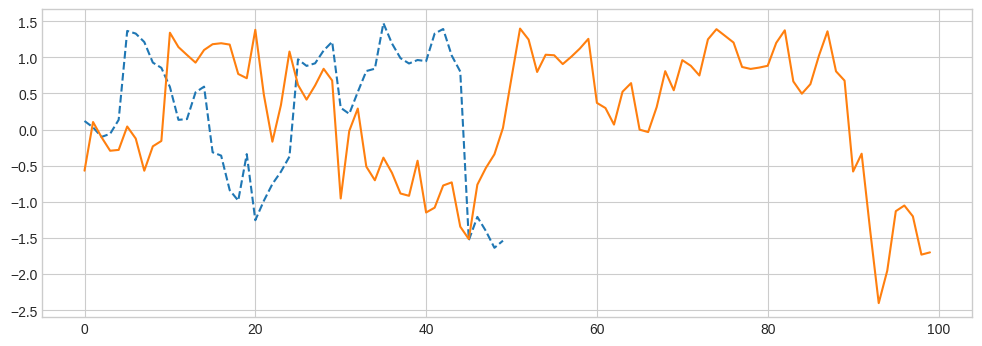

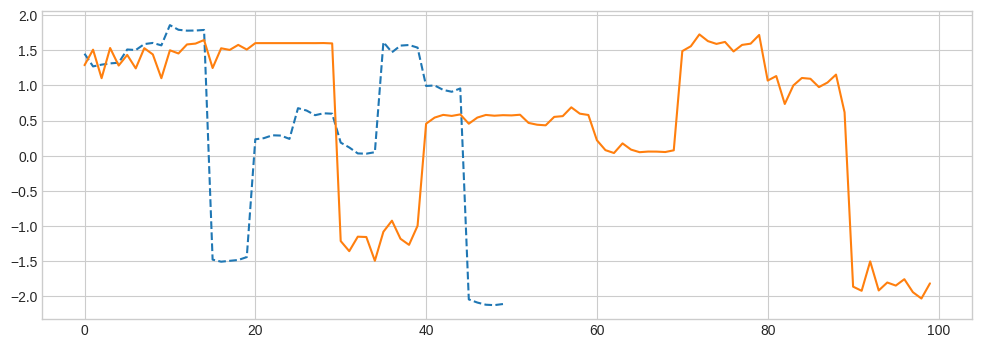

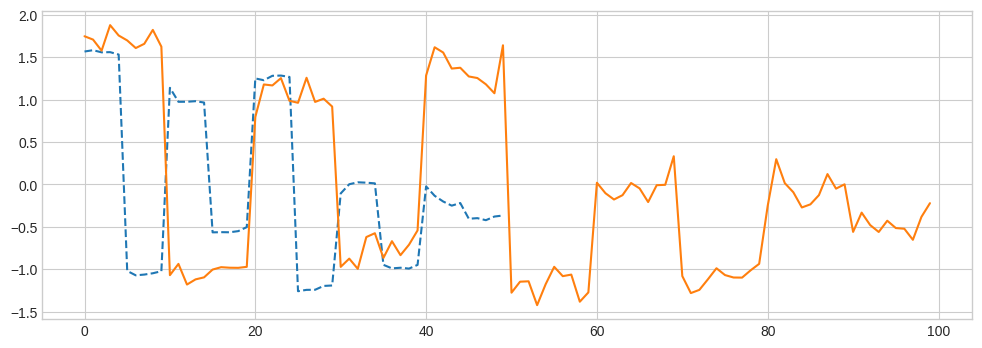

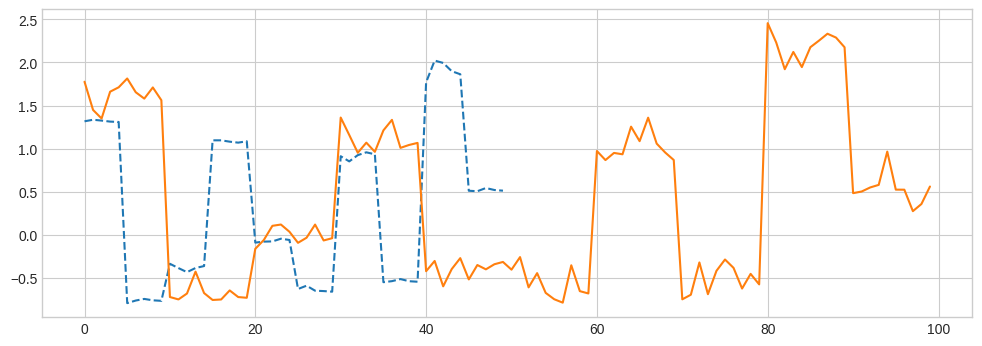

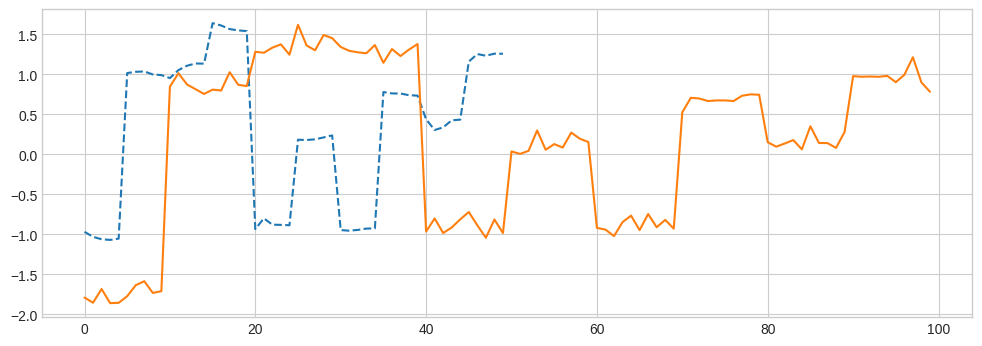

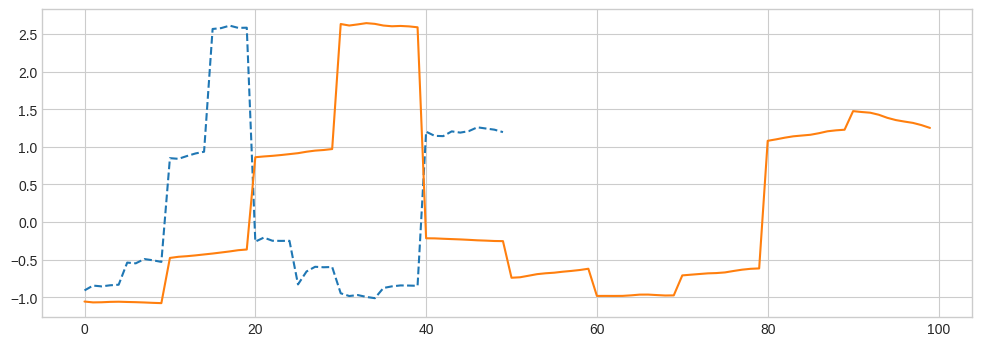

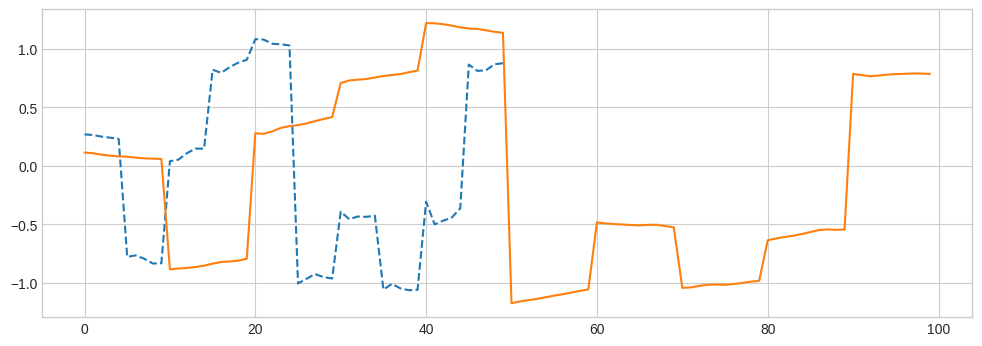

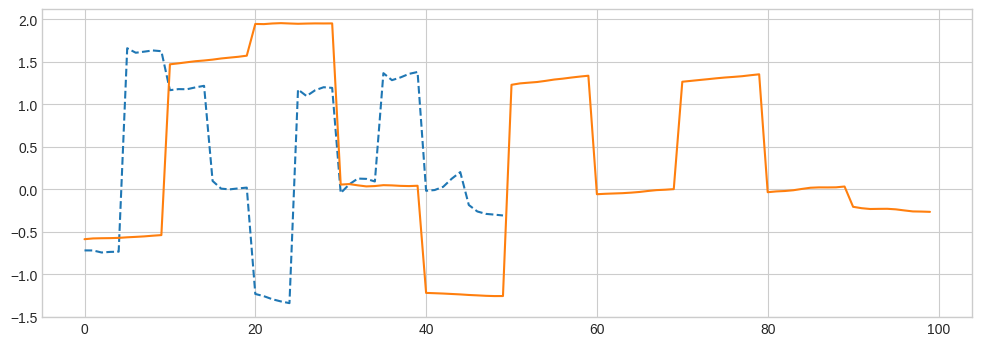

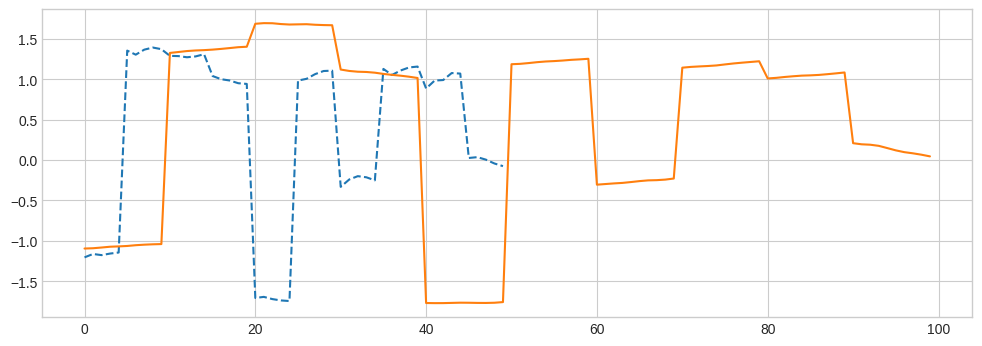

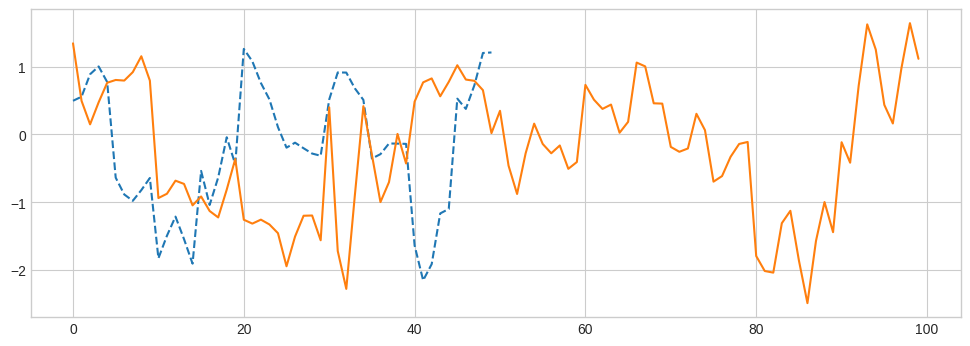

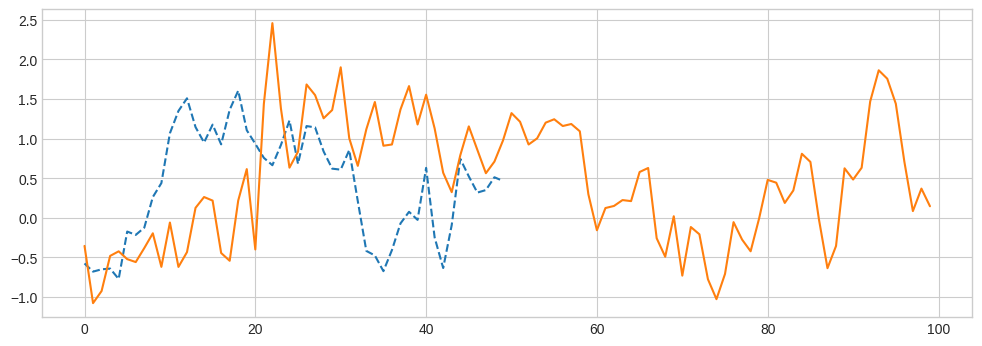

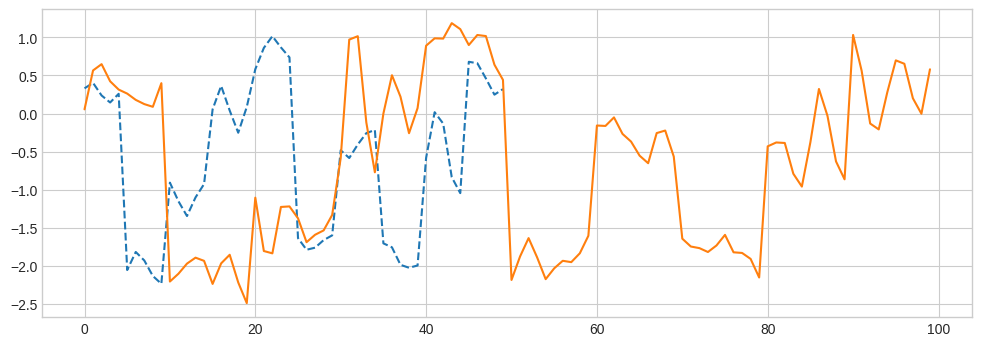

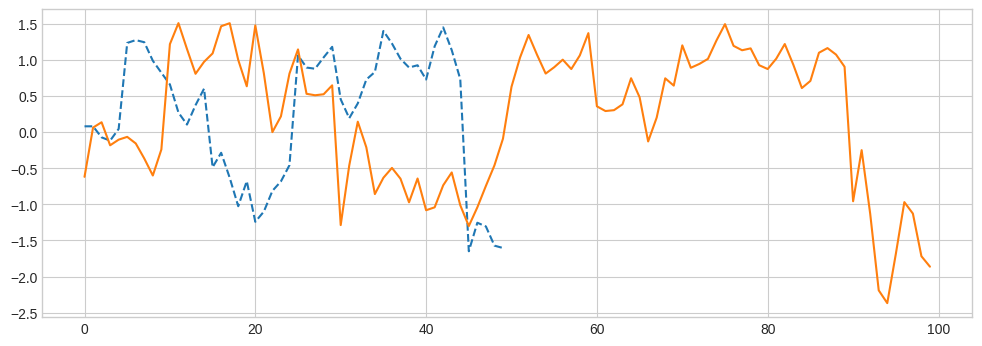

In [15]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(12,4))
    #x = np.linspace(0, sequence_length)
    plt.plot(yo.flatten(0,1)[:,i].to("cpu").detach().numpy(), linestyle='--')

    plt.plot(x.flatten(0,1)[:,i].to("cpu").detach().numpy())

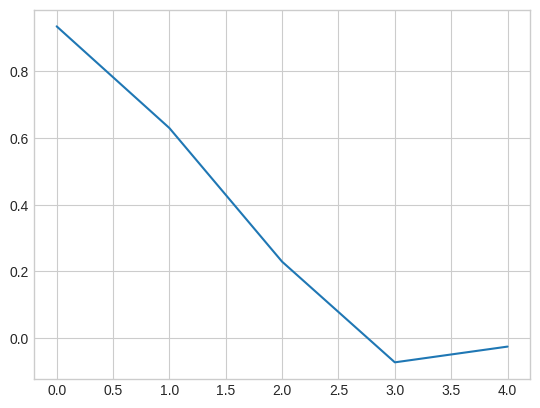

In [18]:
x, y = next(iter(test_iter))
x, enc, yo = model(x.to('cuda'))
feat = 0

if predict:
    plt.plot(y[0,:,feat].to("cpu").detach().numpy())
else:
    plt.plot(x[0,:,feat].to("cpu").detach().numpy())

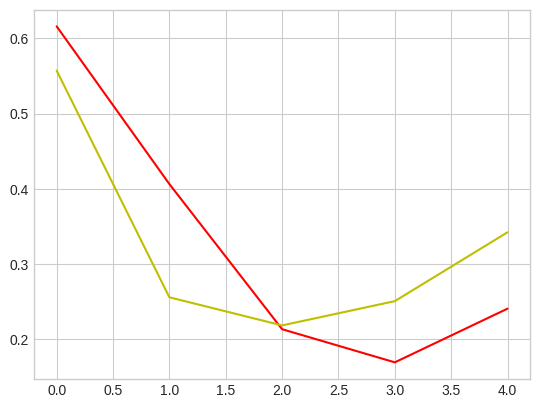

In [19]:
plt.plot(yo[1,:,feat].to("cpu").detach().numpy(), 'r')
plt.plot(y[1,:,feat].to("cpu").detach().numpy(), 'y')

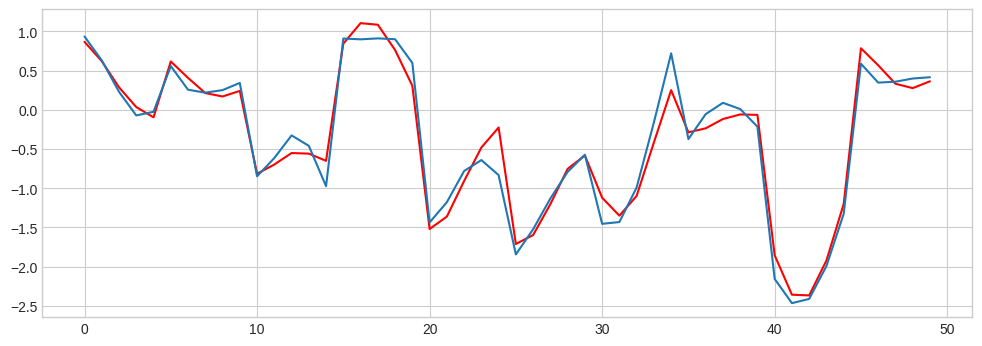

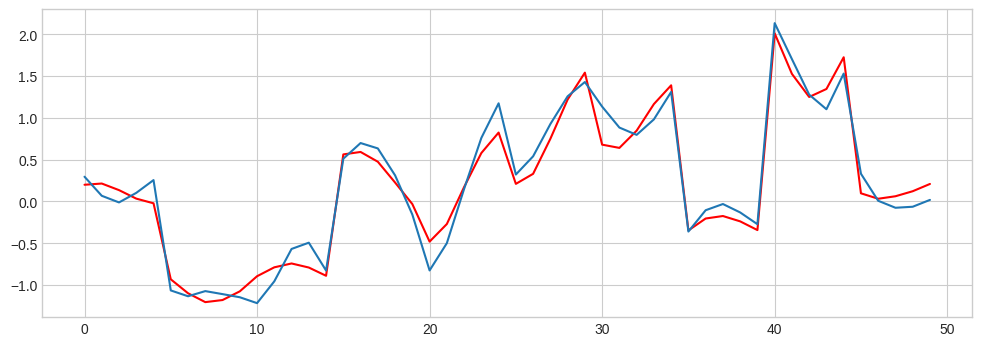

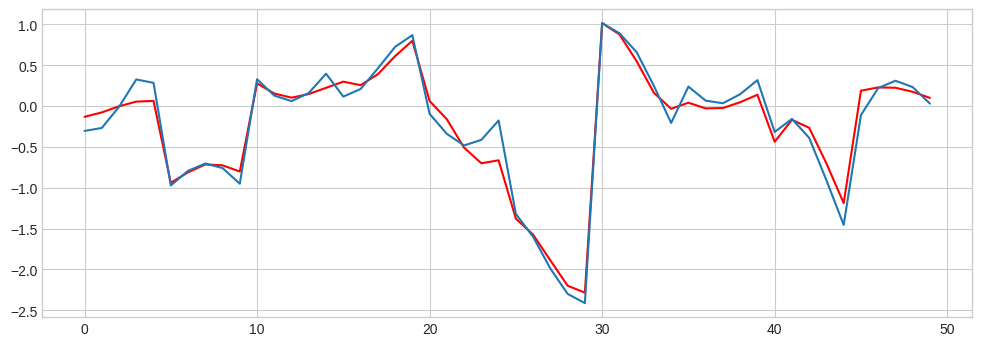

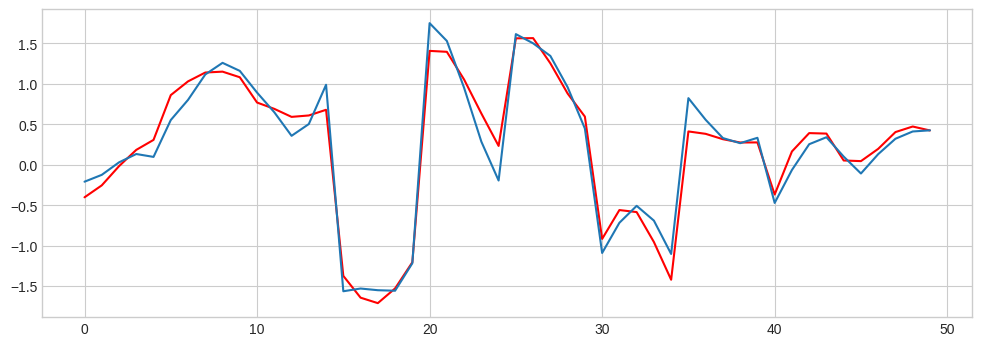

In [20]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(12,4))
    #x = np.linspace(0, sequence_length)
    plt.plot(yo.flatten(0,1)[:100,i].to("cpu").detach().numpy(), 'r')
    plt.plot(x.flatten(0,1)[:100,i].to("cpu").detach().numpy())

#Inject anomaly

In [21]:
x, y = next(iter(test_iter))

In [25]:
n_std = 5

In [26]:
batch = 5
x_a = x.clone()
change_value = [0, 1,2]
injected = []
for i in range(x.shape[2]):
    print(i)
    if i in change_value:
        print('changing')
        inject = list(x_a[batch ,:, i].cpu().numpy())
        inject_anomaly = [t + n_std*np.std(inject)*random.uniform(0.8,1) for t in inject]
        #x_a[batch,:, i] =  torch.Tensor(fake)
        x_a[batch,:, i] = torch.Tensor(inject_anomaly)
        
        injected.append(i)
    
    if all(x_a[batch,:,i]==x[batch,:,i]):
        print('original tensor and anomalous are the same on features',i)

0
changing
1
changing
2
changing
3
original tensor and anomalous are the same on features 3


In [27]:
idx = batch*sequence_length
x_a, enc, yo_a = model(x_a.to('cuda'))
x, enc, yo = model(x.to('cuda'))
len(x_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())

40

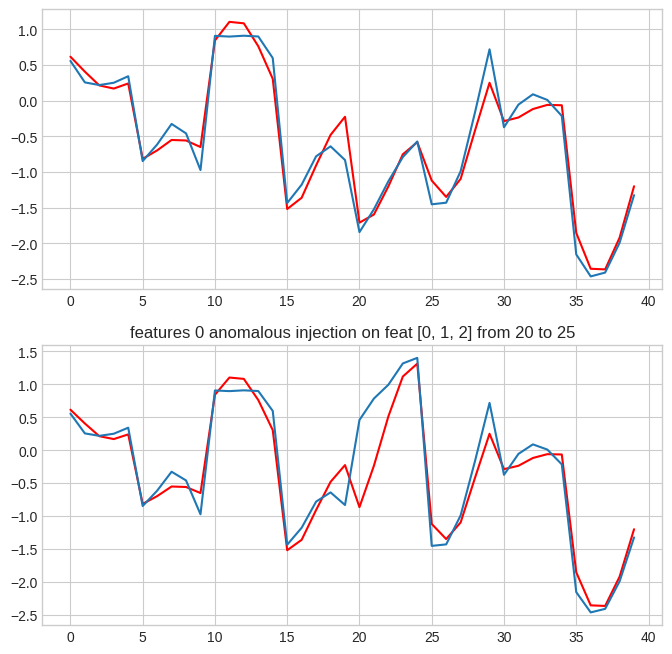

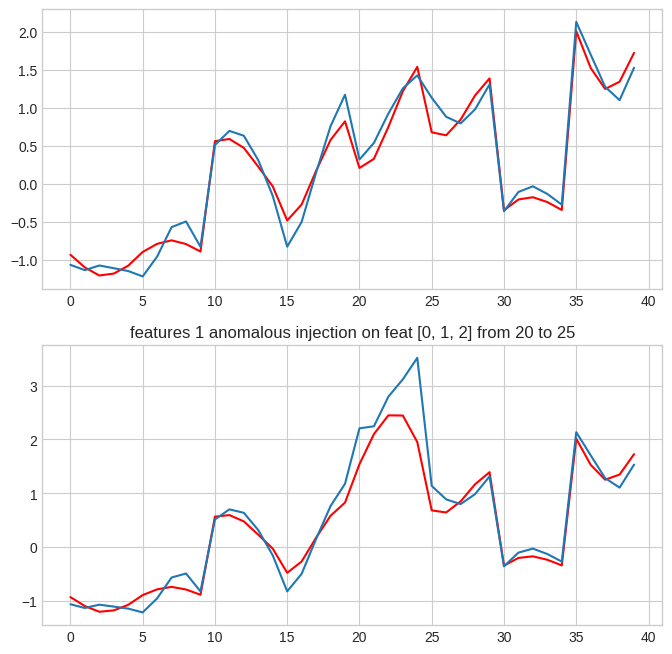

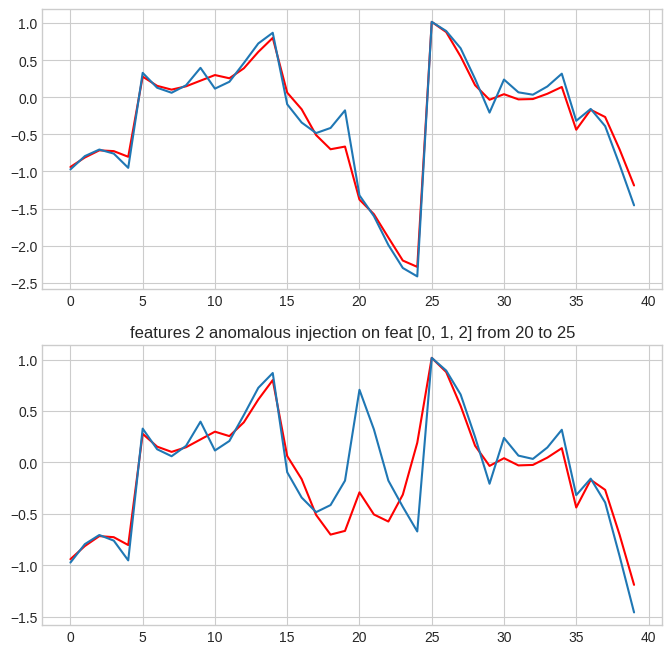

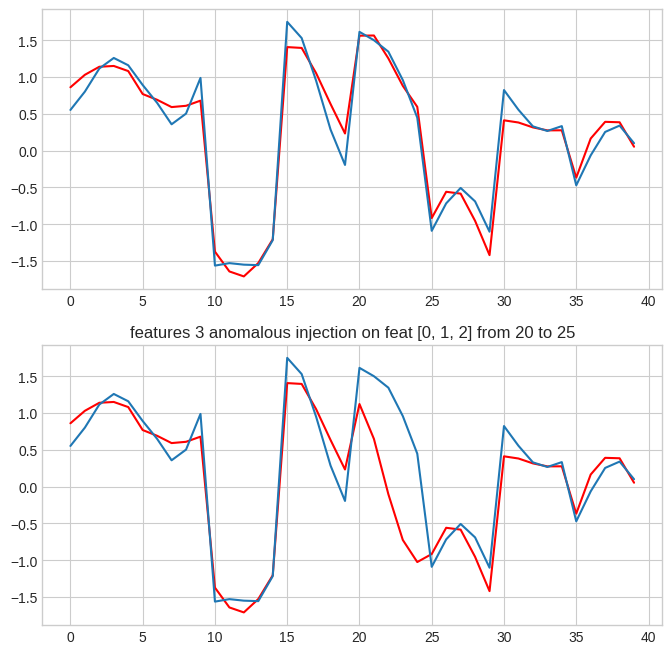

In [28]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig, axs = plt.subplots(2, figsize=(8,8))
    #x = np.linspace(0, sequence_length)
    axs[0].plot(yo.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy(), 'r')
    axs[0].plot(x.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())
    plt.title('no anomalies')
    axs[1].plot(yo_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy(), 'r')
    axs[1].plot(x_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())

    an_idx = len(x_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())//2

    plt.title('features {} anomalous injection on feat {} from {} to {}'\
              .format(i ,injected, int(an_idx), int(an_idx)+ batch))